<a href="https://colab.research.google.com/github/RezaRejo/Final-Project-Data-Science/blob/main/EDA_Gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

##Access to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Read Data

In [ ]:
file_path = '/content/drive/MyDrive/Dibimbing DS33B+/FINAL PROJECT DS DA/PROJECT/Final Project Data Science/gym_membership_final.csv'
df = pd.read_csv(file_path)
df.head()

,id,gender,birthday,age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,avg_time_check_in,avg_time_check_out,...,uses_sauna,last_visit_date,recency,abonoment_value,personal_training_val,drink_abo_val,sauna_val,monetary,age_category,number_of_members
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,19:31:00,21:27:00,...,True,2025-05-02,51,2,0,0,1,250,Young Adult,493
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,19:31:00,20:19:00,...,False,2025-06-08,14,1,1,0,0,180,Mature,507
2,3,Male,1983-03-30,41,Premium,1,Sat,True,08:29:00,10:32:00,...,False,2025-04-12,71,2,1,1,0,280,Mature,493
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,09:54:00,11:33:00,...,True,2025-04-23,60,2,1,1,1,310,Mature,493
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,08:29:00,09:19:00,...,False,2025-06-02,20,1,1,0,0,170,Mature,507


#Pivot Table

Rata-rata visit per week berdasarkan gender dan kategori umur

In [ ]:
pivot = df.pivot_table(index='gender', columns='age_category', values='visit_per_week', aggfunc='mean')
pivot.head()

age_category,Mature,Teenager,Young Adult
gender,,,
Female,2.590426,2.805825,2.787736
Male,2.620853,2.567010,2.714286


#Visualisasi

##Distribusi umur

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

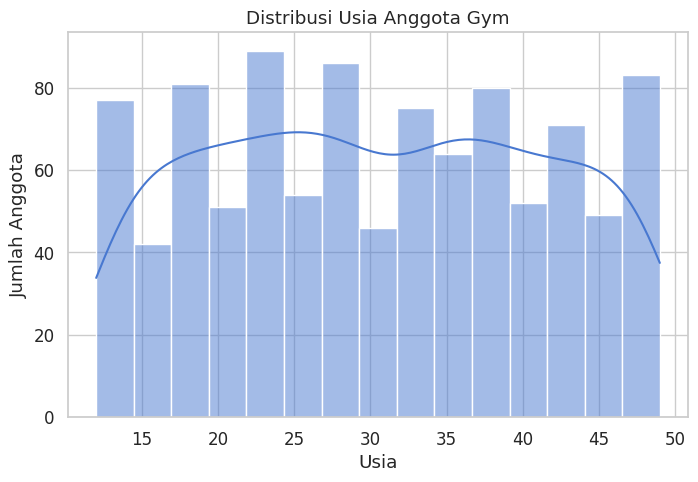

In [ ]:
# 1. Distribusi Usia Anggota
# ==============================
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=15, kde=True)
plt.title("Distribusi Usia Anggota Gym")
plt.xlabel("Usia")
plt.ylabel("Jumlah Anggota")
plt.show()

Mayoritas anggota berada pada rentang 20–35 tahun, segmen usia muda lebih dominan.

##Distribusi Per Week

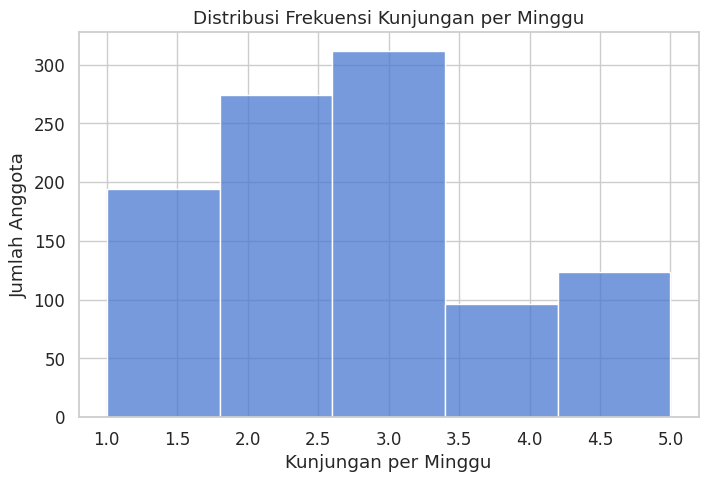

In [ ]:
# 2. Distribusi Kunjungan per Minggu
# ==============================
plt.figure(figsize=(8,5))
sns.histplot(df["visit_per_week"], bins=5, kde=False)
plt.title("Distribusi Frekuensi Kunjungan per Minggu")
plt.xlabel("Kunjungan per Minggu")
plt.ylabel("Jumlah Anggota")
plt.show()

Kebanyakan anggota datang 2–3 kali seminggu, sangat sedikit yang berkunjung >5 kali.

##Boxplot Recency

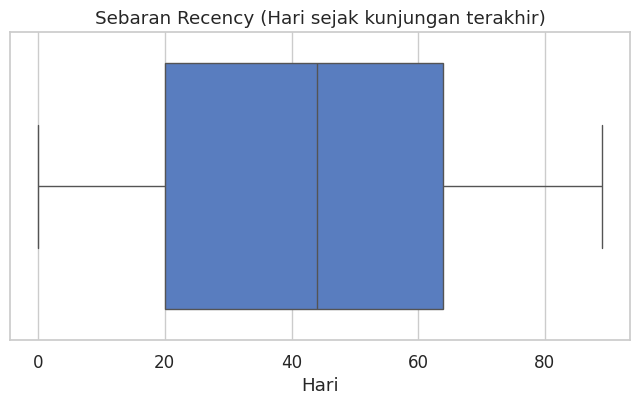

In [ ]:
# 3. Boxplot Recency
# ==============================
plt.figure(figsize=(8,4))
sns.boxplot(x=df["recency"])
plt.title("Sebaran Recency (Hari sejak kunjungan terakhir)")
plt.xlabel("Hari")
plt.show()

Boxplot menunjukkan sebagian besar anggota terakhir datang <30 hari lalu, namun ada outlier hingga hampir 90 hari (indikasi potensi churn).

##Scatter plot Age vs Monetary

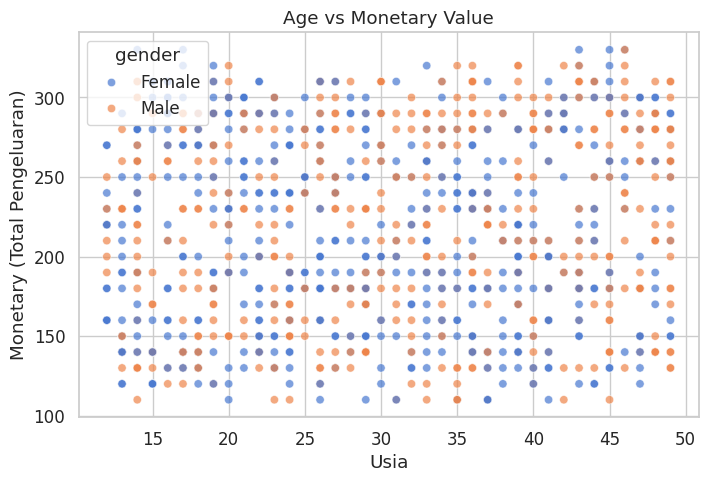

In [ ]:
# 4. Scatter plot Age vs Monetary
# ==============================
plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="monetary", data=df, hue="gender", alpha=0.7)
plt.title("Age vs Monetary Value")
plt.xlabel("Usia")
plt.ylabel("Monetary (Total Pengeluaran)")
plt.show()

Tidak ada hubungan linear jelas, namun terlihat bahwa pengeluaran cenderung lebih tinggi pada anggota 25–35 tahun.

##Gender

/tmp/ipython-input-3660304053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="gender", data=df, palette="Set2")


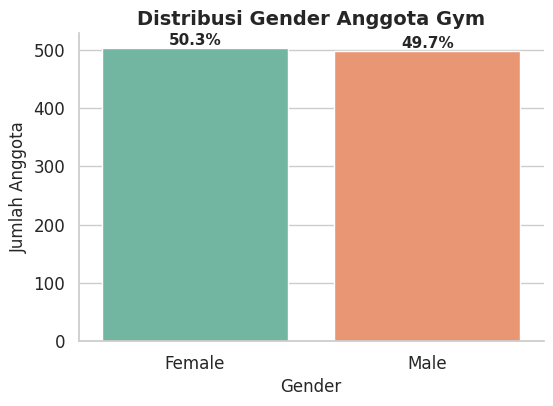

In [ ]:
# ==============================
# 5. Perbandingan Gender (Versi Lebih Menarik)
# ==============================
plt.figure(figsize=(6,4))
ax = sns.countplot(x="gender", data=df, palette="Set2")

# Tambahkan label persentase di atas bar
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f"{100 * count/total:.1f}%"
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=11, fontweight="bold")

plt.title("Distribusi Gender Anggota Gym", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Jumlah Anggota", fontsize=12)
sns.despine()  # hilangkan garis atas dan kanan
plt.show()

Distribusi relatif seimbang, meskipun anggota perempuan sedikit lebih banyak daripada laki-laki.

#CHURN

In [ ]:
# Buat kolom churn (1 = churned, 0 = active)
df["churn"] = (df["recency"] > 30).astype(int)

# Cek distribusi churn
churn_counts = df["churn"].value_counts()
churn_ratio = df["churn"].value_counts(normalize=True) * 100

print("Jumlah anggota berdasarkan churn:")
print(churn_counts)
print("\nPersentase churn:")
print(churn_ratio)

Jumlah anggota berdasarkan churn:
churn
1    643
0    357
Name: count, dtype: int64

Persentase churn:
churn
1    64.3
0    35.7
Name: proportion, dtype: float64


##Distribusi churn

/tmp/ipython-input-513707856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="Set2")


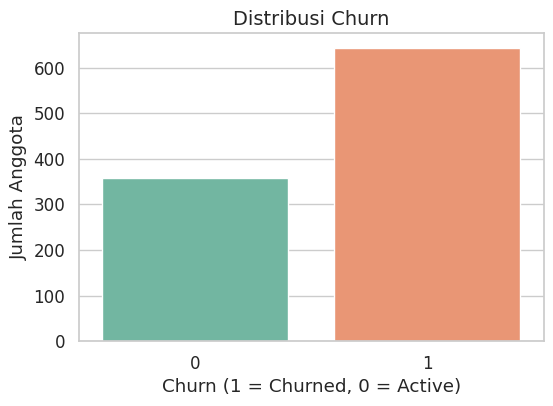

In [ ]:
# Distribusi churn
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="Set2")
plt.title("Distribusi Churn", fontsize=14)
plt.xlabel("Churn (1 = Churned, 0 = Active)")
plt.ylabel("Jumlah Anggota")
plt.show()

## Churn berdasarkan kategori usia

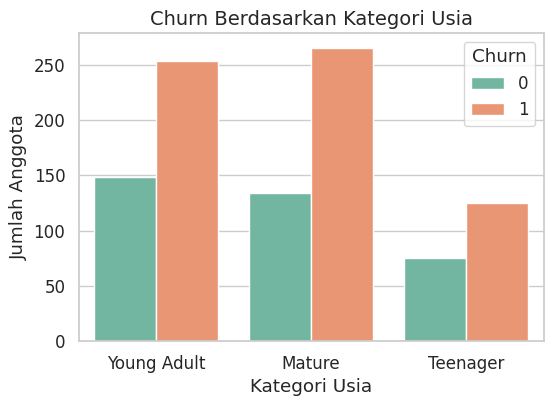

In [ ]:
# Churn berdasarkan kategori usia
plt.figure(figsize=(6,4))
sns.countplot(x="age_category", hue="churn", data=df, palette="Set2")
plt.title("Churn Berdasarkan Kategori Usia", fontsize=14)
plt.xlabel("Kategori Usia")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Churn")
plt.show()

## Churn berdasarkan tipe abonemen

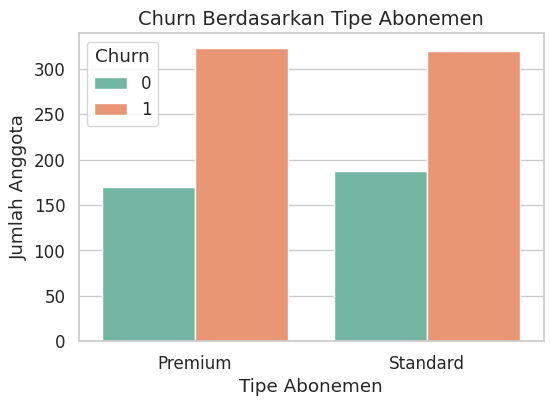

In [ ]:
# Churn berdasarkan tipe abonemen
plt.figure(figsize=(6,4))
sns.countplot(x="abonoment_type", hue="churn", data=df, palette="Set2")
plt.title("Churn Berdasarkan Tipe Abonemen", fontsize=14)
plt.xlabel("Tipe Abonemen")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Churn")
plt.show()

#PERILAKU

##Churn Per Week

/tmp/ipython-input-825497083.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="churn", y="visit_per_week", data=df, palette="Set2", ci=None)
/tmp/ipython-input-825497083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="churn", y="visit_per_week", data=df, palette="Set2", ci=None)


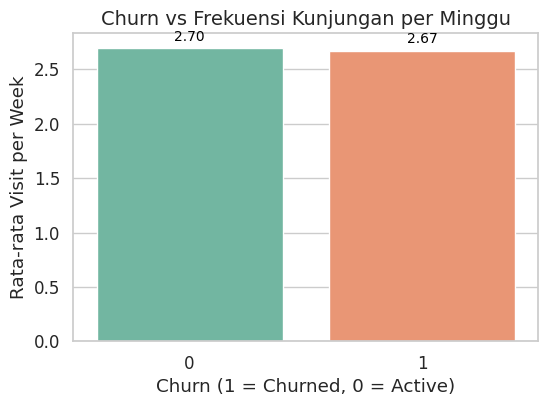

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="churn", y="visit_per_week", data=df, palette="Set2", ci=None)

# Tambahkan label nilai di atas bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black",
                xytext=(0, 3), textcoords="offset points")

plt.title("Churn vs Frekuensi Kunjungan per Minggu", fontsize=14)
plt.xlabel("Churn (1 = Churned, 0 = Active)")
plt.ylabel("Rata-rata Visit per Week")
plt.show()

##Churn ALL

/tmp/ipython-input-699753312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="avg_time_in_gym", data=df, palette="Set2")


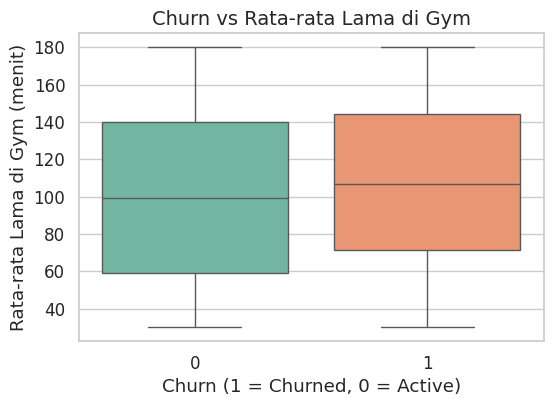

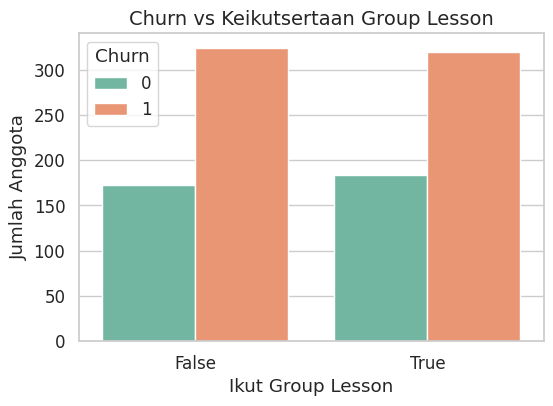

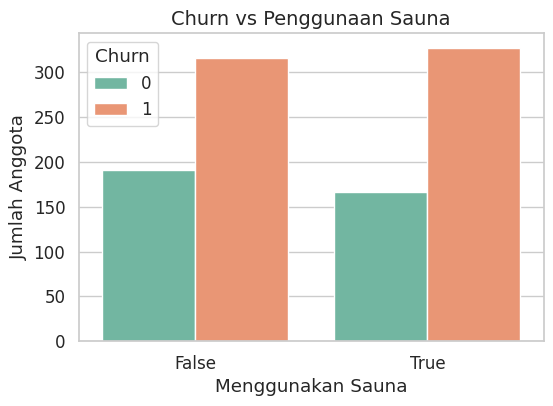

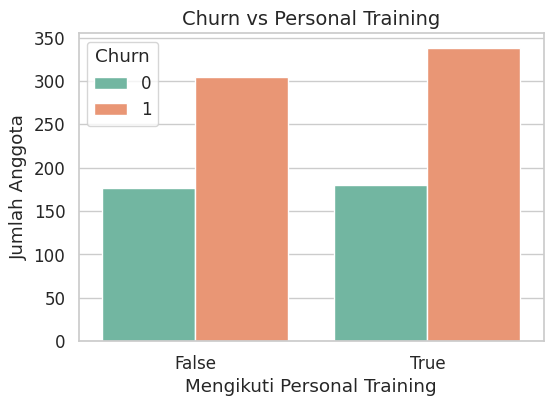

In [ ]:
# 2. Distribusi churn berdasarkan rata-rata lama di gym (menit)
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="avg_time_in_gym", data=df, palette="Set2")
plt.title("Churn vs Rata-rata Lama di Gym", fontsize=14)
plt.xlabel("Churn (1 = Churned, 0 = Active)")
plt.ylabel("Rata-rata Lama di Gym (menit)")
plt.show()

# 3. Churn berdasarkan keikutsertaan group lesson
plt.figure(figsize=(6,4))
sns.countplot(x="attend_group_lesson", hue="churn", data=df, palette="Set2")
plt.title("Churn vs Keikutsertaan Group Lesson", fontsize=14)
plt.xlabel("Ikut Group Lesson")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Churn")
plt.show()

# 4. Churn berdasarkan penggunaan sauna
plt.figure(figsize=(6,4))
sns.countplot(x="uses_sauna", hue="churn", data=df, palette="Set2")
plt.title("Churn vs Penggunaan Sauna", fontsize=14)
plt.xlabel("Menggunakan Sauna")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Churn")
plt.show()

# 5. Churn berdasarkan personal training
plt.figure(figsize=(6,4))
sns.countplot(x="personal_training", hue="churn", data=df, palette="Set2")
plt.title("Churn vs Personal Training", fontsize=14)
plt.xlabel("Mengikuti Personal Training")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Churn")
plt.show()